### Liliana Forero

In [1]:
#Import libraries
from time import sleep
from os import system
import pandas as pd   # Librería para leer y generar archivos
import matplotlib.pyplot as plt  # Librería generar gráficos y tablas

In [2]:
#Print Bienvenida
print("\n**********************************************")
print("                ° Data CharK ° ")
print("    Análisis de viviendas nuevas en Bogotá    ")
print("**********************************************\n")

print("                 ¡Bienvenido!                 \n\n")


**********************************************
                ° Data CharK ° 
    Análisis de viviendas nuevas en Bogotá    
**********************************************

                 ¡Bienvenido!                 




In [3]:
#Consts
# caracterizar las variables que influyen en la compra de viviendas
variable = {    
    "A": "Precio (m^2)",
    "B": "Precio Vivienda",
    "C": "Estrato",
    "D": "Area (m^2)",
    "E": "Alcobas", 
    "F": "Baños",
    "G": "Parqueadero",
    "H": "Parques",
    "I": "Vias (m^2)",
    "J": "Supermercados",
    "K": "Colegios",
    "L": "Hospitales"
}

stratum = [
    "Estrato 2",
    "Estrato 3",
    "Estrato 4",
    "Estrato 5",
    "Estrato 6"
]

data = pd.read_csv("data/vivienda_localidad.csv")

In [4]:
#Retorna un gráfico donde compara una variable con la zona

def generate_grafic(variable):
    
    zones = data["Zona"] # Trae la columna de datos Zona
    target = data[variable] #Trae la columna seleccionada por el usuario
    length = len(zones)  
    for i in range(0,length,10):
        if i>=length-10: #[0:9],[9:19],[19:29],[29:39]
            plt.figure(figsize=(4,5),dpi=80)
            plt.bar(
                zones[i:length],
                target[i:length],
                color = "blue",
                width = 0.8
            )
            plt.xlabel("Zona")
            plt.ylabel(variable)
            plt.show()
            break
        plt.figure(figsize=(15,5),dpi=80)
        plt.bar(
            zones[i:i+10],
            target[i:i+10],
            color = "blue",
            width = 0.8
        )
        plt.xlabel("Zona")
        plt.ylabel(variable)
        plt.show()    



In [5]:
# Retorna la tabla completa de viviendas nuevas por localidad
# Tabla que genera la alcaldia
def generate_table():
    
    fig, ax = plt.subplots()
    collabel= data.head(0)
    table = ax.table(
        cellText=data.values.tolist(),
        colLabels=tuple(collabel),
        loc='center'
    )
    table.set_fontsize(10)
    table.scale(4,1)
    ax.axis('off')
    plt.show() 

In [6]:
# Retorna la tabla de viviendas nuevas por estratos

def generate_table_stratum(stratum):

    data_by_stratum = data[round(data["Estrato"]) == stratum] #Contiene todas las filas filtradas por estrato  - Lista de panda

    data_handle = {
        "Estrato":[int(i) for i in round(data_by_stratum["Estrato"]).tolist()], #
        "Zona":data_by_stratum["Zona"].tolist(),
        "Precio en millones (m^2)": round(data_by_stratum["Precio (m^2)"],2).tolist(),
        "Precio Vivienda en millones": round(data_by_stratum["Precio Vivienda"],2).tolist()
        }

    df = pd.DataFrame(data_handle) #Se convierte el data_handle en un objeto de Panda (Data frame)    

    fig, ax = plt.subplots()
    collabel= df.head(0)
    table = ax.table(
        cellText=df.values.tolist(),
        colLabels=tuple(collabel),
        loc='center',
        cellLoc='center'
        )
    table.set_fontsize(10)
    table.scale(2,1)
    ax.axis('off')
    plt.show()

¿Cuál de las siguientes opciones desea consultar?
            [1]. Viviendas nuevas por localidad
            [2]. Viviendas nuevas por estratos
            [0]. Salir
1
**** Viviendas nuevas por localidad ****
¿Con cuál de la siguientes variables desea visualizar la vivienda de acuerdo a la zona?
[A]. Precio (m^2)
[B]. Precio Vivienda
[C]. Estrato
[D]. Area (m^2)
[E]. Alcobas
[F]. Baños
[G]. Parqueadero
[H]. Parques
[I]. Vias (m^2)
[J]. Supermercados
[K]. Colegios
[L]. Hospitales
Ingrese la opción que desea: c


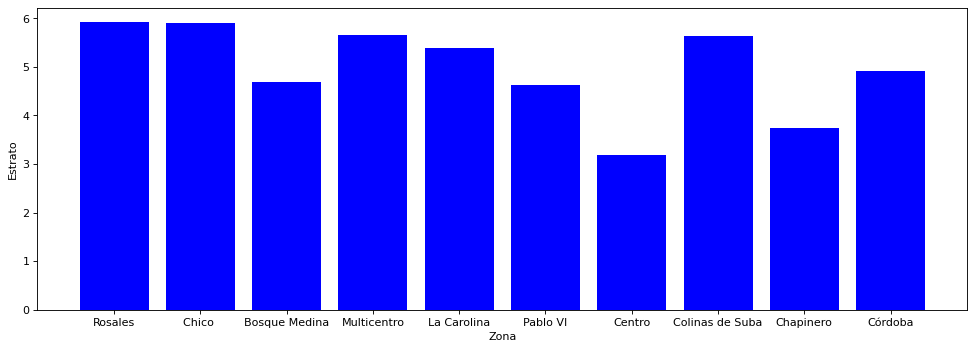

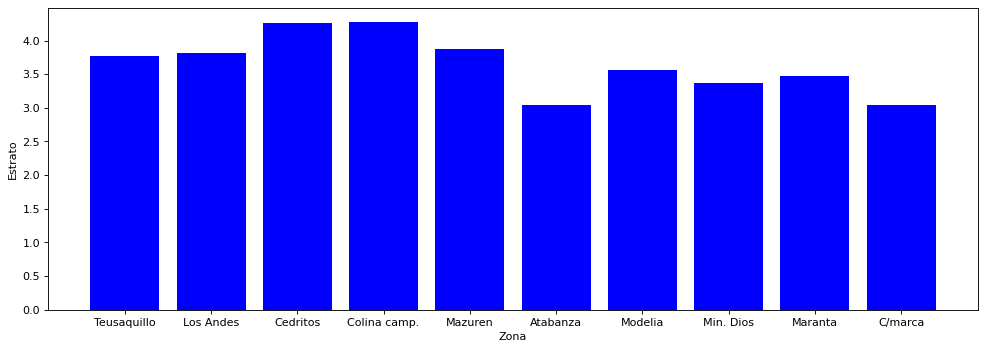

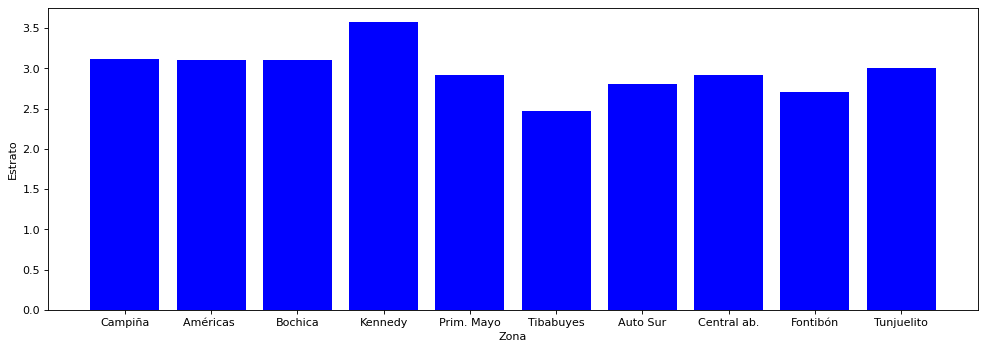

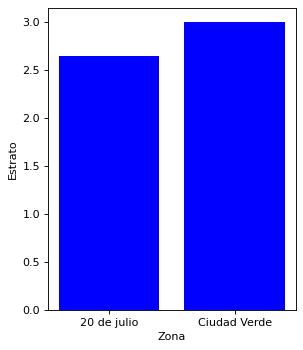

Desea volver a visualizar el menu de las variables
[S]. Si
[N]. No
n
¿Cuál de las siguientes opciones desea consultar?
            [1]. Viviendas nuevas por localidad
            [2]. Viviendas nuevas por estratos
            [0]. Salir
2
**** Viviendas nuevas por estratos ****
Desea ver la tabla completa 
[S]. Si
[N]. No
n
¿Por cuál estrato desea consultar la vivienda?
[2]. Estrato 2
[3]. Estrato 3
[4]. Estrato 4
[5]. Estrato 5
[6]. Estrato 6
Ingrese la opción que desea: 2


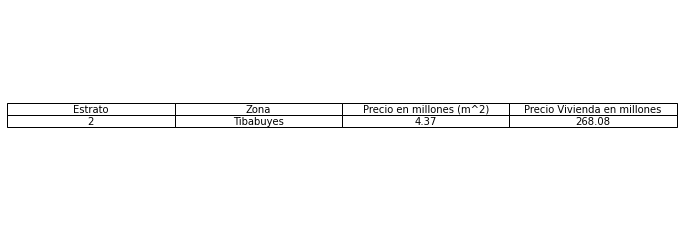

Desea volver a visualizar el menu de los estratos
[S]. Si
[N]. No
n
¿Cuál de las siguientes opciones desea consultar?
            [1]. Viviendas nuevas por localidad
            [2]. Viviendas nuevas por estratos
            [0]. Salir
0
Gracias por usar Data CharK...


In [7]:
# body
while True:
    try:
        option = int(input(
            """¿Cuál de las siguientes opciones desea consultar?
            [1]. Viviendas nuevas por localidad
            [2]. Viviendas nuevas por estratos
            [0]. Salir\n"""
        ))
        if option == 1:
            print("**** Viviendas nuevas por localidad ****")
            while True:
                state = 0
                text = "" 
                while state == 0:
                    try:
                        text += "¿Con cuál de la siguientes variables desea visualizar la vivienda de acuerdo a la zona?\n"
                        
                        #variables para la compra de vivienda
                        for key, value in variable.items():
                             text += f"[{key}]. {value}\n"  

                        text += "Ingrese la opción que desea: "
                        option_user = input(text).upper()
                        #Validación de diccionario (Si la llave no existe genera Error)
                        generate_grafic(variable[option_user])
                        state +=1
                    except:
                        text = "" 
                        text += "Error, ingresaste una opción no valida\n" 
                validate = input("Desea volver a visualizar el menu de las variables\n[S]. Si\n[N]. No\n").upper()
                if validate == "S":
                    continue
                elif validate == "N":
                    break


        elif option == 2:
            print("**** Viviendas nuevas por estratos ****")
            total_data = input("Desea ver la tabla completa \n[S]. Si\n[N]. No\n").upper()
            if total_data == "S":
                #Funcion que genera la tabla completa
                generate_table()
            elif total_data == "N":
                pass
            while True:
                
                state = 0
                text = "" 
                while state == 0:
                    try: 
                        text += "¿Por cuál estrato desea consultar la vivienda?\n"
                        #Funcion de tabla por estratos
                        for e, i in enumerate(stratum):
                            text += f"[{e+2}]. {i}\n"
                        text += "Ingrese la opción que desea: "
                        option_user = int(input(text))
                        if not (option_user >1 and option_user <=6):
                            raise
                        generate_table_stratum(option_user)
                        state +=1
                    except:
                        text = "" 
                        text += "¡Error!, ingresaste una opción no valida.\n" 
                validate = input("Desea volver a visualizar el menu de los estratos\n[S]. Si\n[N]. No\n").upper()
                if validate == "S":
                    state = 0
                elif validate == "N":
                    break
        elif option == 0:
            print("Gracias por usar Data CharK...")
            break

    except:
        print("¡Error!, ingresaste una opción no valida")
        sleep(4)
        system("cls")
        continue